In [1]:
import os
import pandas as po
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = po.read_csv('../data/2017_energy_5min_noTransform.csv')

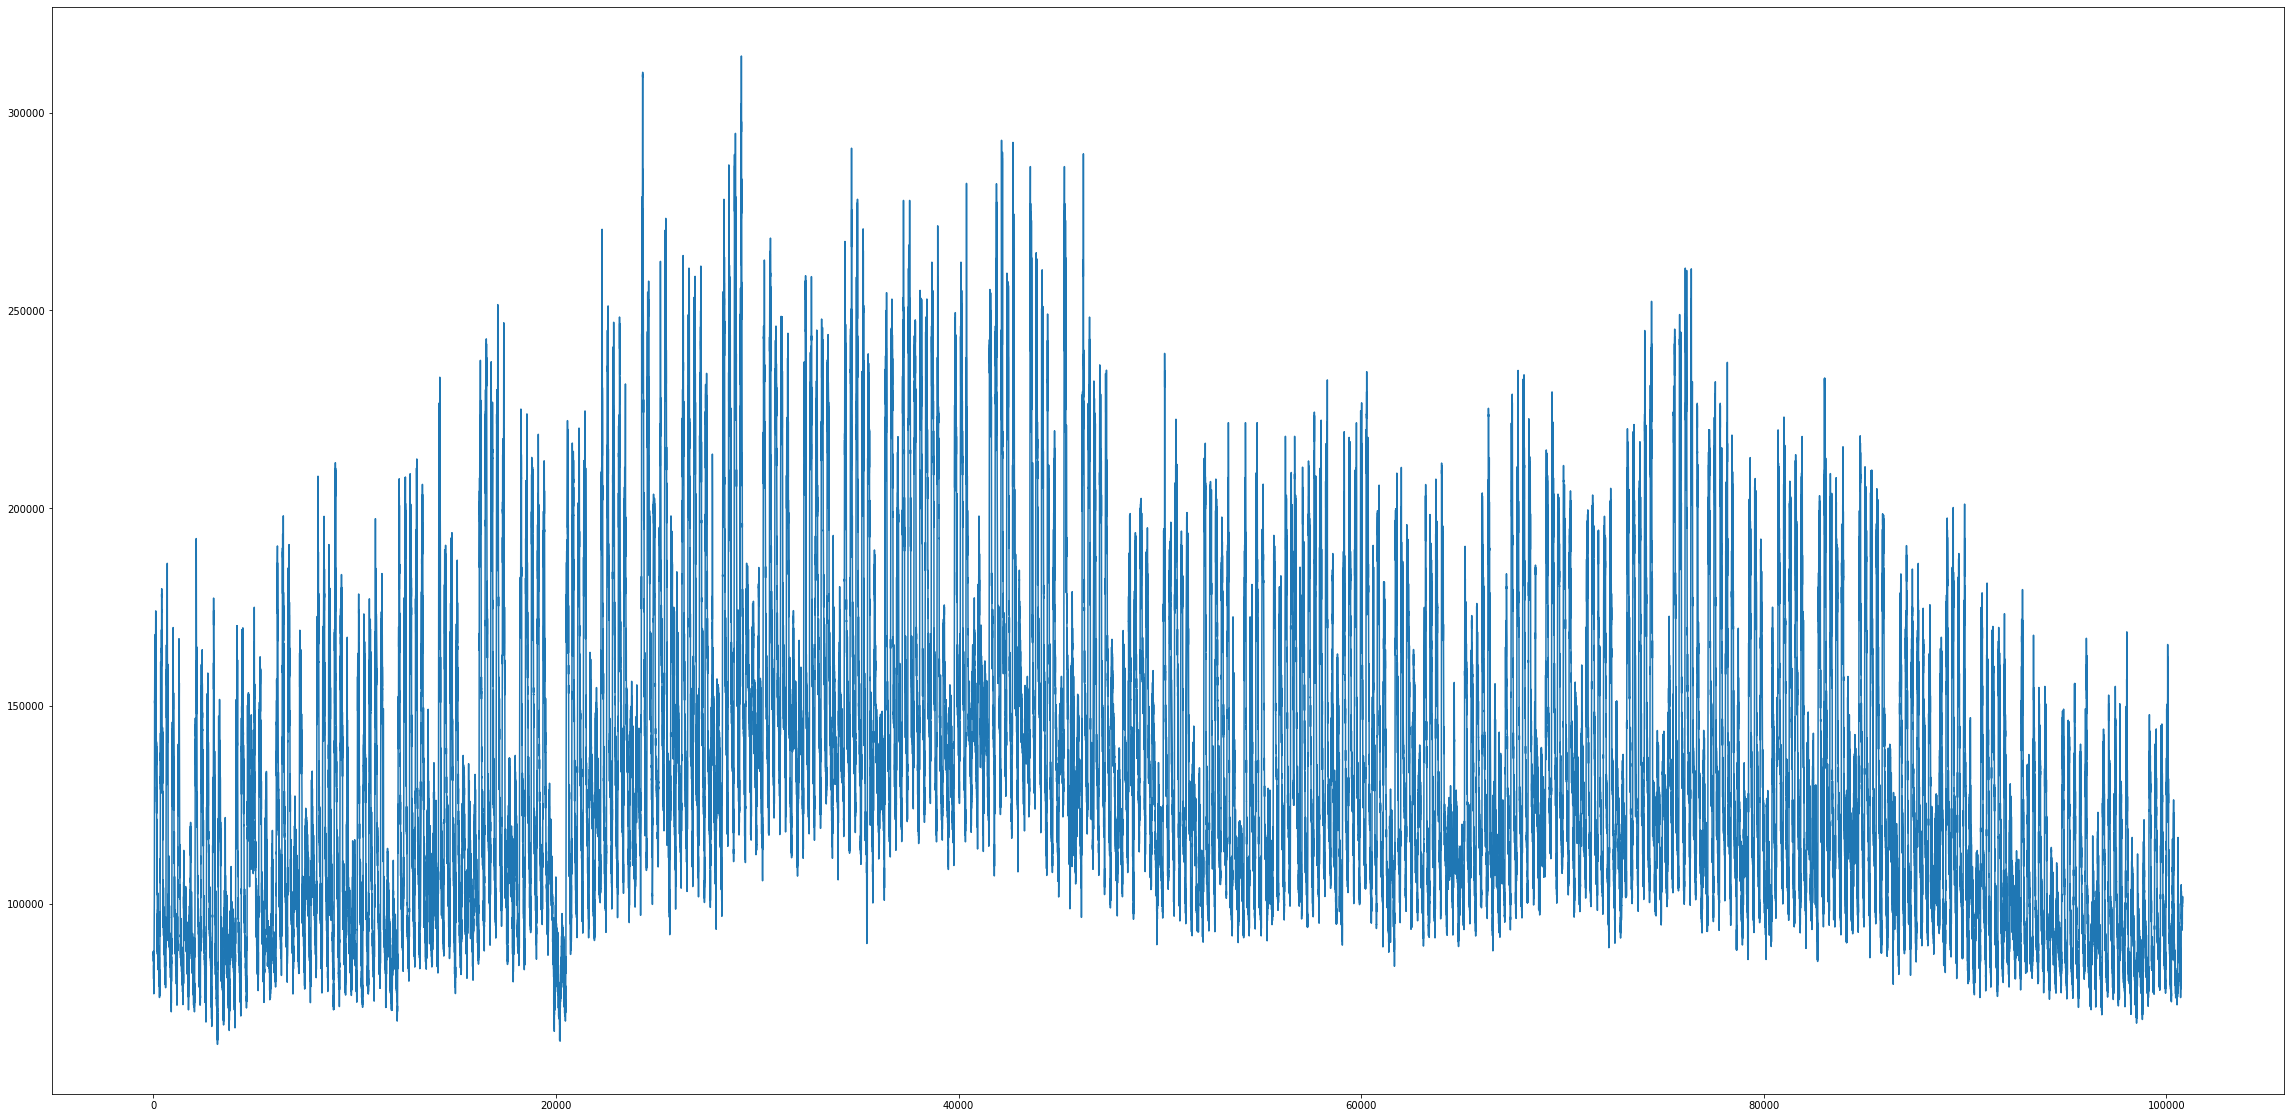

In [3]:
plt.figure(figsize=(40,20))
plt.plot(df)
plt.savefig('../Outputs/DataAnalysis/raw_data.png')

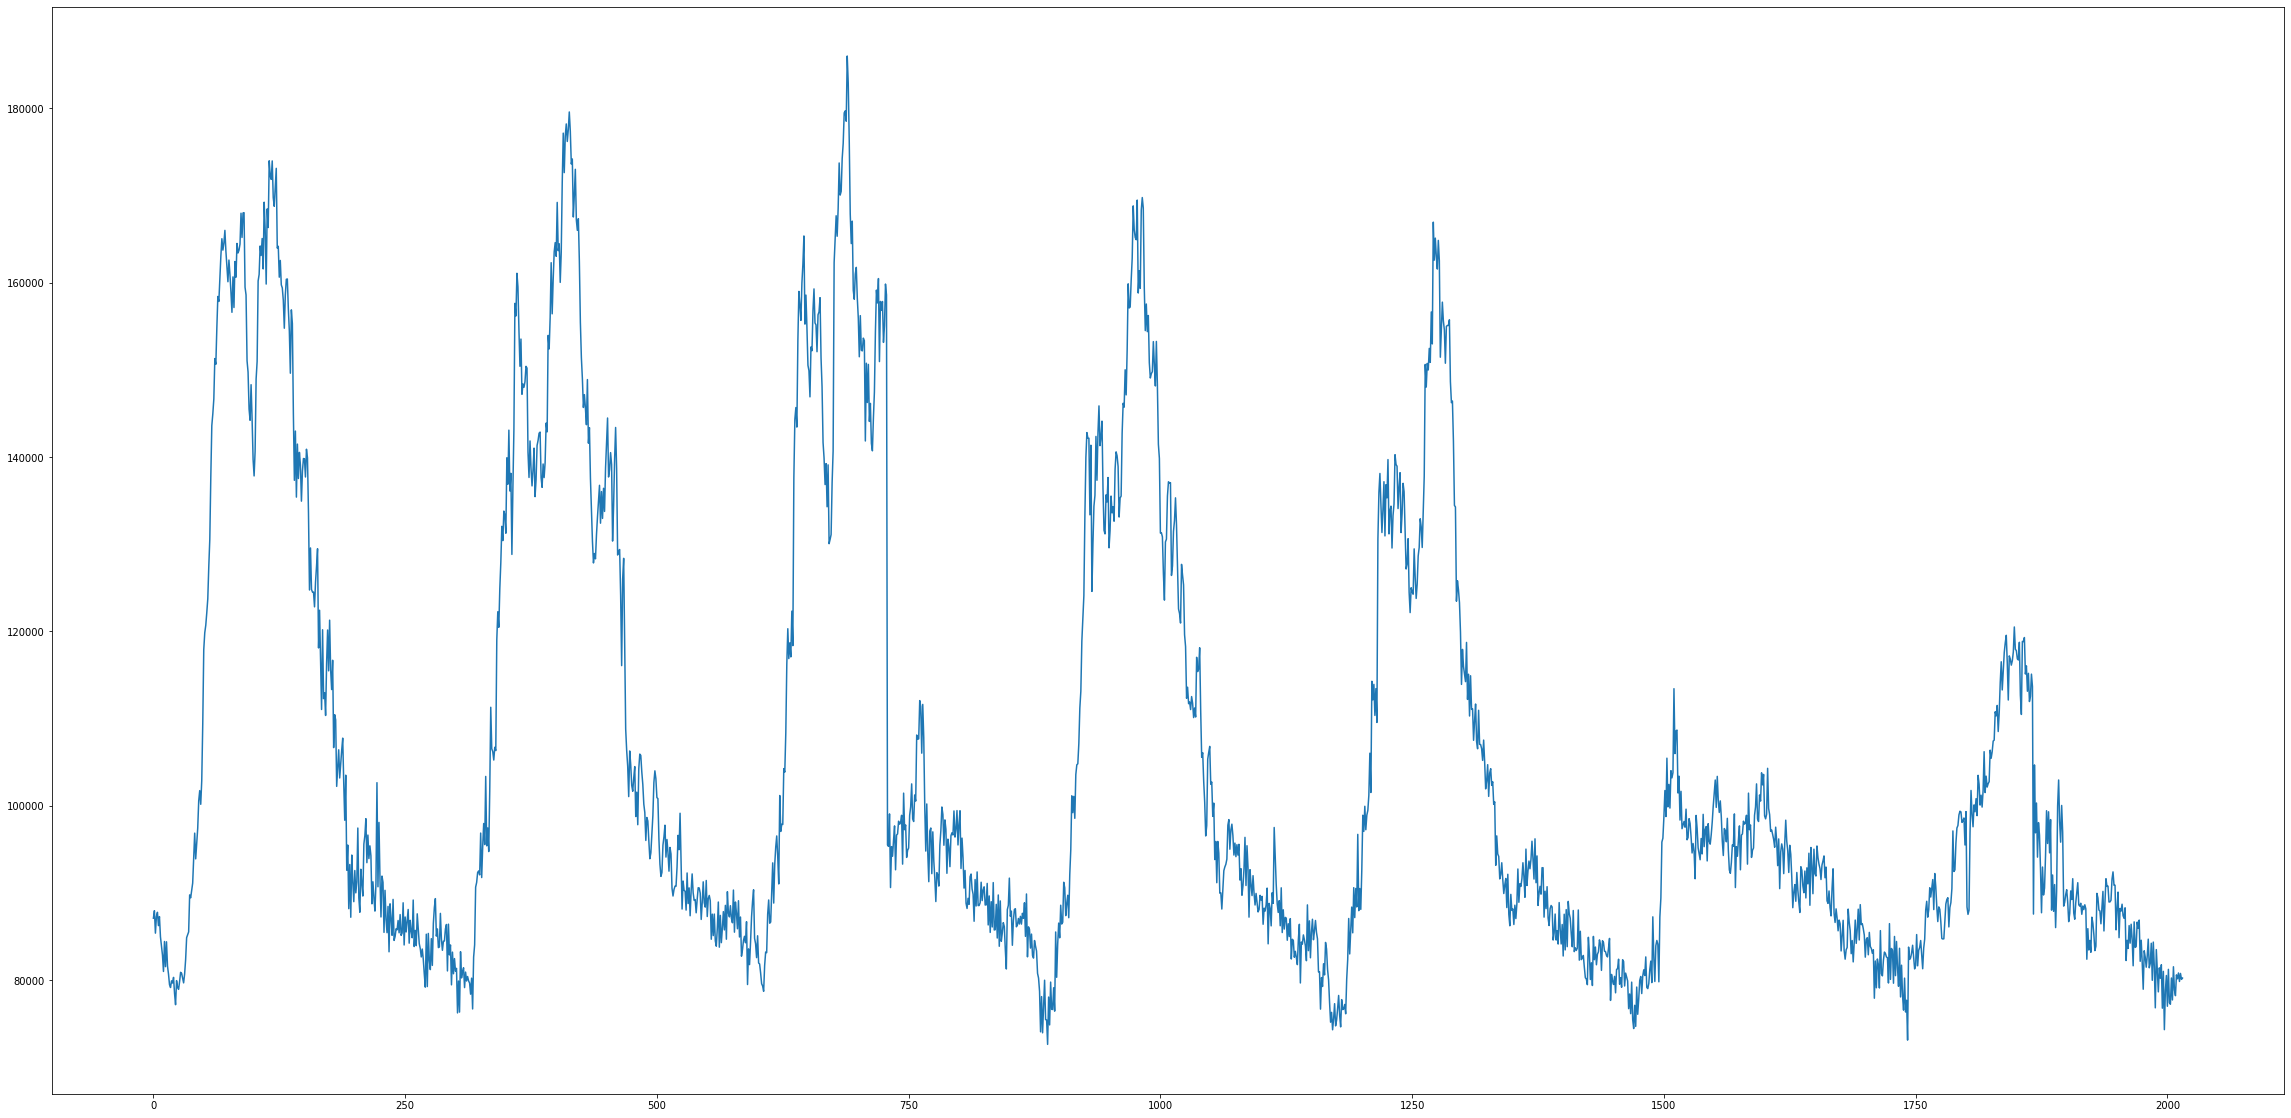

In [4]:
plt.figure(figsize=(40,20))
plt.plot(df[:288*7])
plt.savefig('../Outputs/DataAnalysis/one_week.png')

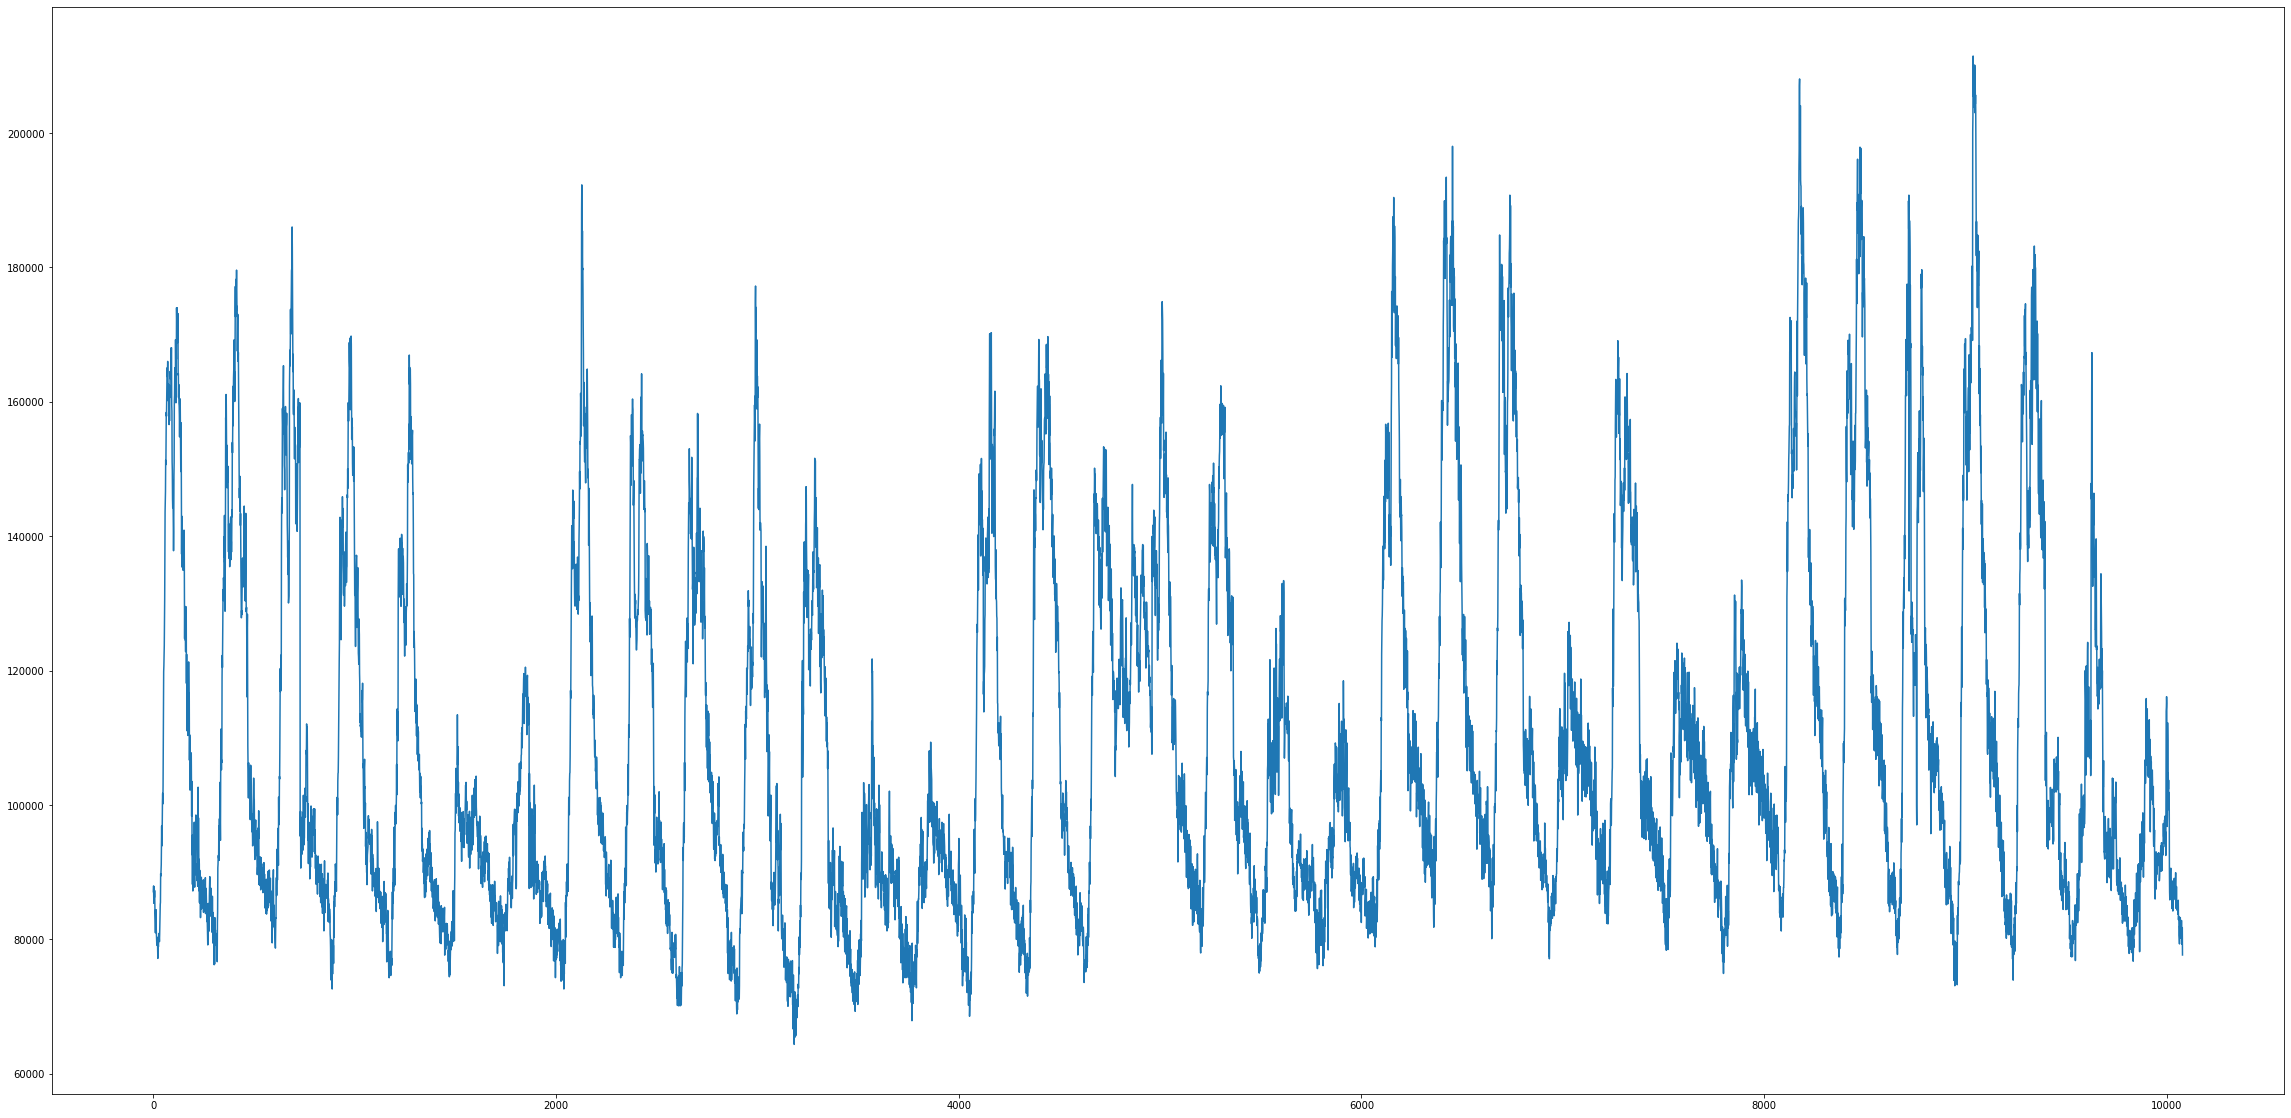

In [5]:
plt.figure(figsize=(40,20))
plt.plot(df[:288*35])
plt.savefig('../Outputs/DataAnalysis/five_weeks.png')

In [6]:
df_d = df.describe()
df_d

,W
count,100800.000000
mean,135025.482383
std,40115.165369
min,64388.232923
25%,104767.912871
50%,125908.538168
75%,156903.737275
max,314288.239583


In [7]:
files = os.listdir('../data/processed/2017_binned/')
files.sort()

In [8]:
additional_data = {}
additional_data['skew'] = df.skew()[0]
additional_data['kurtosis'] = df.kurtosis()[0]
additional_data['year'] = '2017'
additional_data['start_date'] = files[0][:-4]
additional_data['end_date'] = files[-2][:-4]
additional_data['number_of_days'] = len(files)
additional_data['frequency'] = '5 minutes'
additional_data['number_of_datapoints_per_day'] = 12*24

In [9]:
df_a = po.DataFrame(index=additional_data.keys(), columns=['W'])
df_a['W']['skew'] = additional_data['skew']
df_a['W']['kurtosis'] = additional_data['kurtosis']
df_a['W']['year'] = additional_data['year']
df_a['W']['start_date'] = additional_data['start_date']
df_a['W']['end_date'] = additional_data['end_date']
df_a['W']['number_of_days'] = additional_data['number_of_days']
df_a['W']['frequency'] = additional_data['frequency']
df_a['W']['number_of_datapoints_per_day'] = additional_data['number_of_datapoints_per_day']
df_a

,W
skew,0.919926
kurtosis,0.360565
year,2017
start_date,2017-01-02
end_date,2017-12-30
number_of_days,350
frequency,5 minutes
number_of_datapoints_per_day,288


In [10]:
df_d = df_d.append(df_a)

In [11]:
df_d

,W
count,100800
mean,135025
std,40115.2
min,64388.2
25%,104768
50%,125909
75%,156904
max,314288
skew,0.919926
kurtosis,0.360565


In [31]:
df_d.to_csv('../Outputs/DataAnalysis/raw_data_statistics.csv')

In [12]:
#df.to_csv('../data/2017_energy_5min_noTransform.csv', index=False)

In [13]:
scaler = MinMaxScaler()
#df['W'] = scaler.fit_transform(df)

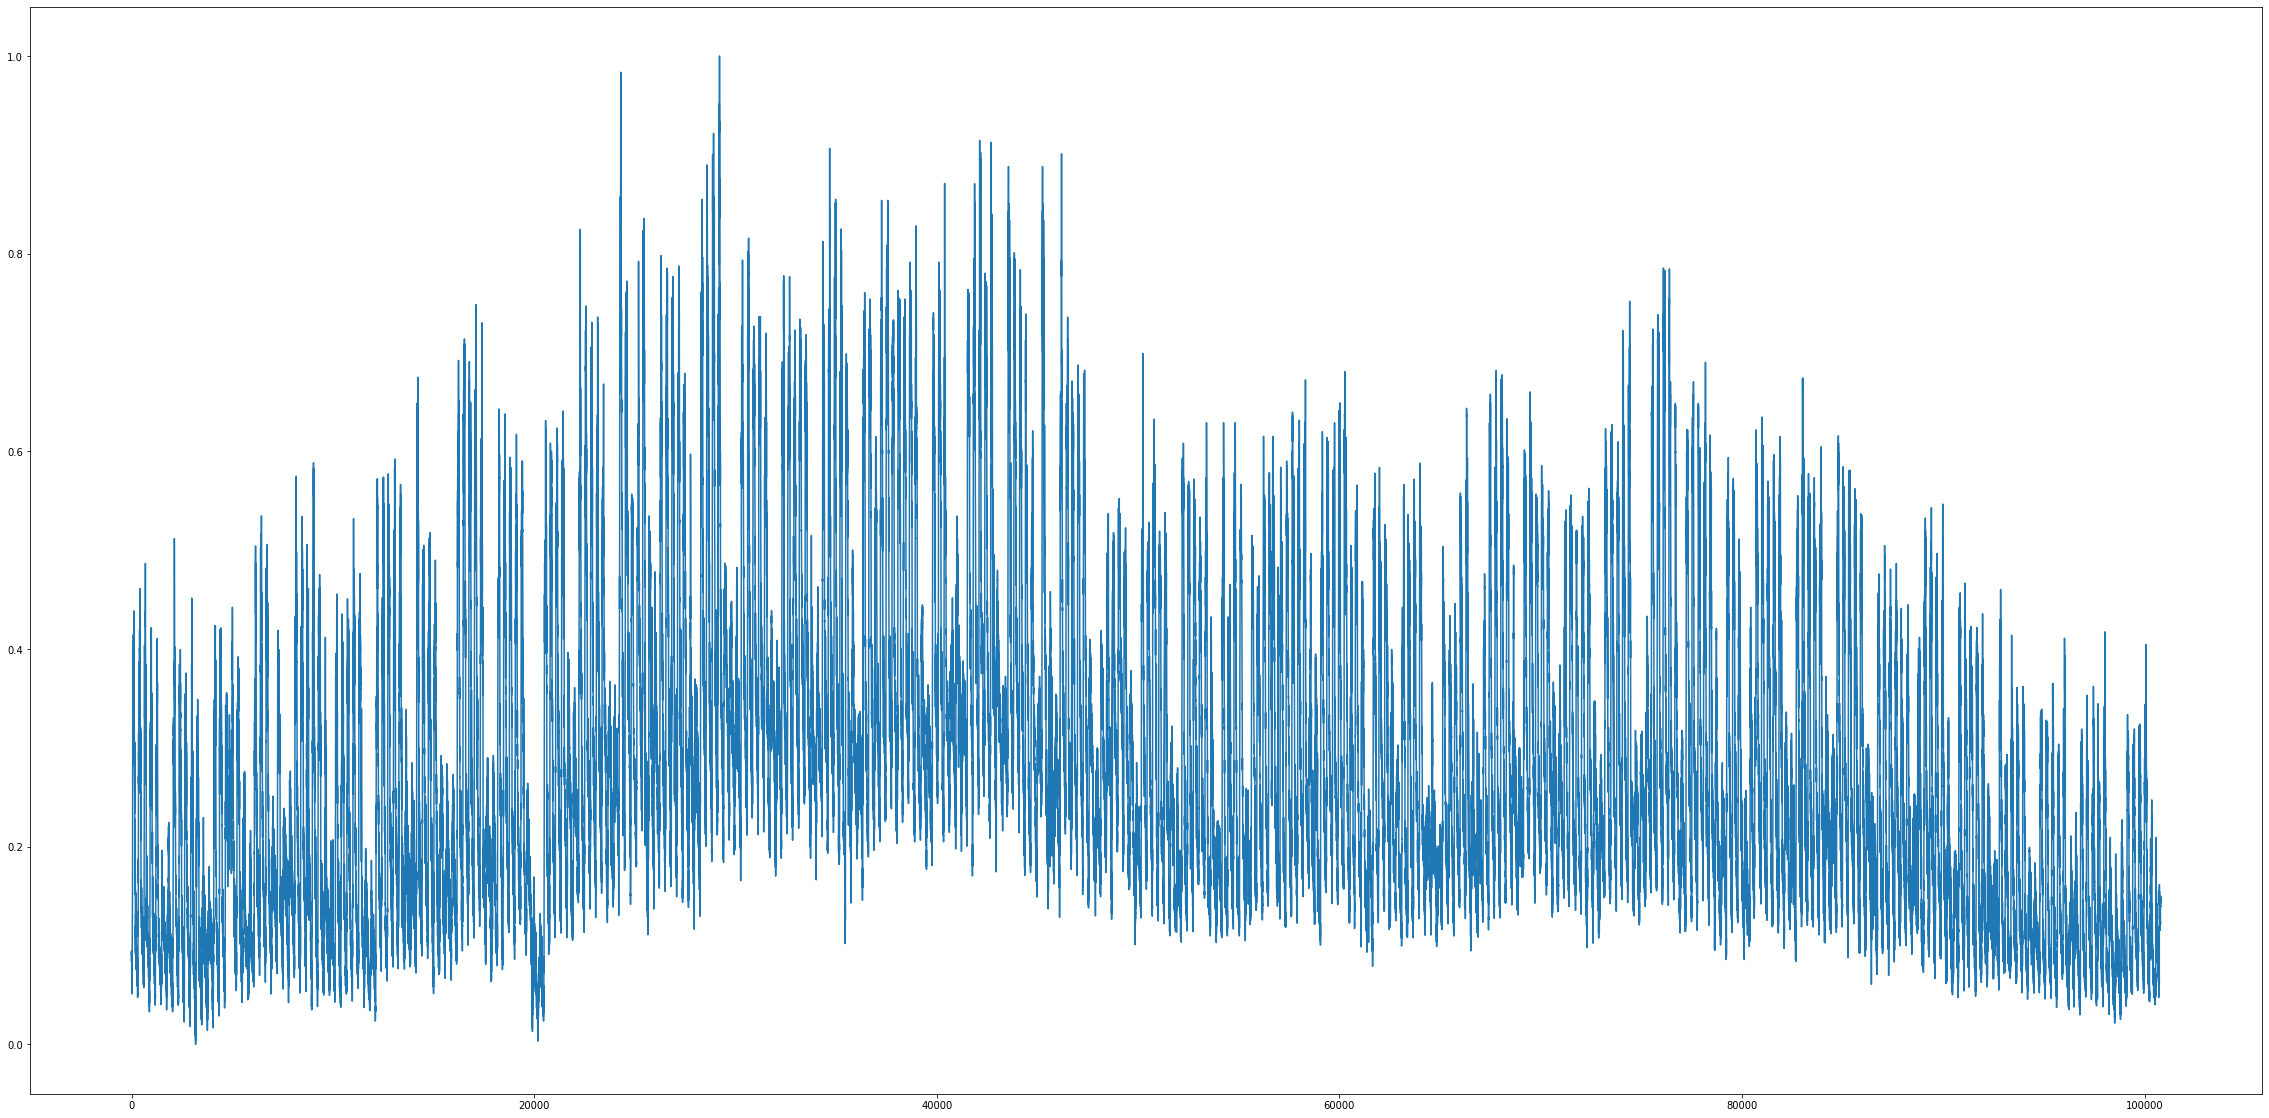

In [14]:
df_s = po.DataFrame(scaler.fit_transform(df))
plt.figure(figsize=(40,20))
plt.plot(df_s)
plt.savefig('../Outputs/DataAnalysis/standardized_data.png')

In [15]:
df_d_s = df_s.describe()
df_d_s

,0
count,100800.000000
mean,0.282662
std,0.160525
min,0.000000
25%,0.161583
50%,0.246180
75%,0.370210
max,1.000000


In [16]:
len(df_s)

100800

In [17]:
len(df_s)//288

350

In [18]:
#train-val-test split
#250, 50, 50 

In [19]:
df_s_train = df_s[:288*250]
df_s_val = df_s[288*250:288*300]
df_s_test = df_s[288*300:288*350]

In [20]:
'''
df_s_train.to_csv('../data/2017_energy_5_min_train.csv', index=False)
df_s_val.to_csv('../data/2017_energy_5_min_val.csv', index=False)
df_s_test.to_csv('../data/2017_energy_5_min_test.csv', index=False)
'''

"\ndf_s_train.to_csv('../data/2017_energy_5_min_train.csv', index=False)\ndf_s_val.to_csv('../data/2017_energy_5_min_val.csv', index=False)\ndf_s_test.to_csv('../data/2017_energy_5_min_test.csv', index=False)\n"

In [21]:
train_start_date = files[0][:-4]
train_end_date = files[250 - 1][:-4]

In [22]:
val_start_date = files[250][:-4]
val_end_date = files[300 - 1][:-4]

In [23]:
test_start_date = files[300][:-4]
test_end_date = files[350 - 1][:-4]

In [24]:
additional_data_s = {}
additional_data_s['skew'] = df_s.skew()[0]
additional_data_s['kurtosis'] = df_s.kurtosis()[0]
additional_data_s['transform'] = 'standardize'
additional_data_s['year'] = '2017'
additional_data_s['start_date'] = files[0][:-4]
additional_data_s['end_date'] = files[-2][:-4]
additional_data_s['train_start_date'] = train_start_date
additional_data_s['train_end_date'] = train_end_date
additional_data_s['val_start_date'] = val_start_date
additional_data_s['val_end_date'] = val_end_date
additional_data_s['test_start_date'] = test_start_date
additional_data_s['test_end_date'] = test_end_date
additional_data_s['number_of_days'] = len(files)
additional_data_s['frequency'] = '5 minutes'
additional_data_s['number_of_datapoints_per_day'] = 12*24

In [26]:
df_a_s = po.DataFrame(index=additional_data_s.keys(), columns=['W'])
df_a_s['W']['skew'] = additional_data_s['skew']
df_a_s['W']['kurtosis'] = additional_data_s['kurtosis']
df_a_s['W']['transform'] = additional_data_s['transform']
df_a_s['W']['year'] = additional_data_s['year']
df_a_s['W']['start_date'] = additional_data_s['start_date']
df_a_s['W']['end_date'] = additional_data_s['end_date']
df_a_s['W']['train_start_date'] = additional_data_s['train_start_date']
df_a_s['W']['train_end_date'] = additional_data_s['train_end_date']
df_a_s['W']['val_start_date'] = additional_data_s['val_start_date']
df_a_s['W']['val_end_date'] = additional_data_s['val_end_date']
df_a_s['W']['test_start_date'] = additional_data_s['test_start_date']
df_a_s['W']['test_end_date'] = additional_data_s['test_end_date']
df_a_s['W']['number_of_days'] = additional_data_s['number_of_days']
df_a_s['W']['frequency'] = additional_data_s['frequency']
df_a_s['W']['number_of_datapoints_per_day'] = additional_data_s['number_of_datapoints_per_day']
df_a_s

,W
skew,0.919926
kurtosis,0.360565
transform,standardize
year,2017
start_date,2017-01-02
end_date,2017-12-30
train_start_date,2017-01-02
train_end_date,2017-09-20
val_start_date,2017-09-21
val_end_date,2017-11-11


In [29]:
df_d_s.columns = ['W']

In [30]:
df_d_s = df_d_s.append(df_a_s)
df_d_s

,W
count,100800
mean,0.282662
std,0.160525
min,0
25%,0.161583
50%,0.24618
75%,0.37021
max,1
skew,0.919926
kurtosis,0.360565


In [32]:
df_d.to_csv('../Outputs/DataAnalysis/standardized_data_statistics.csv')

In [46]:
#STL_Transform on df

In [141]:
stl_obj = STL(df.values, period=288)
decomp = stl_obj.fit()

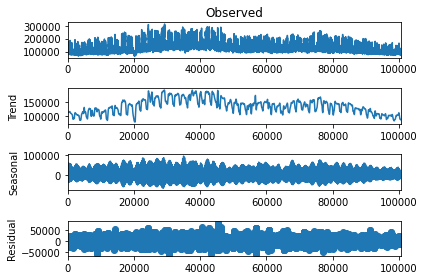

In [142]:
plots = decomp.plot()

In [84]:
plt.figure(figsize=(40,20))
plt.plot(decomp.seasonal[:288*20])

NameError: name 'decomp' is not defined

<Figure size 2880x1440 with 0 Axes>

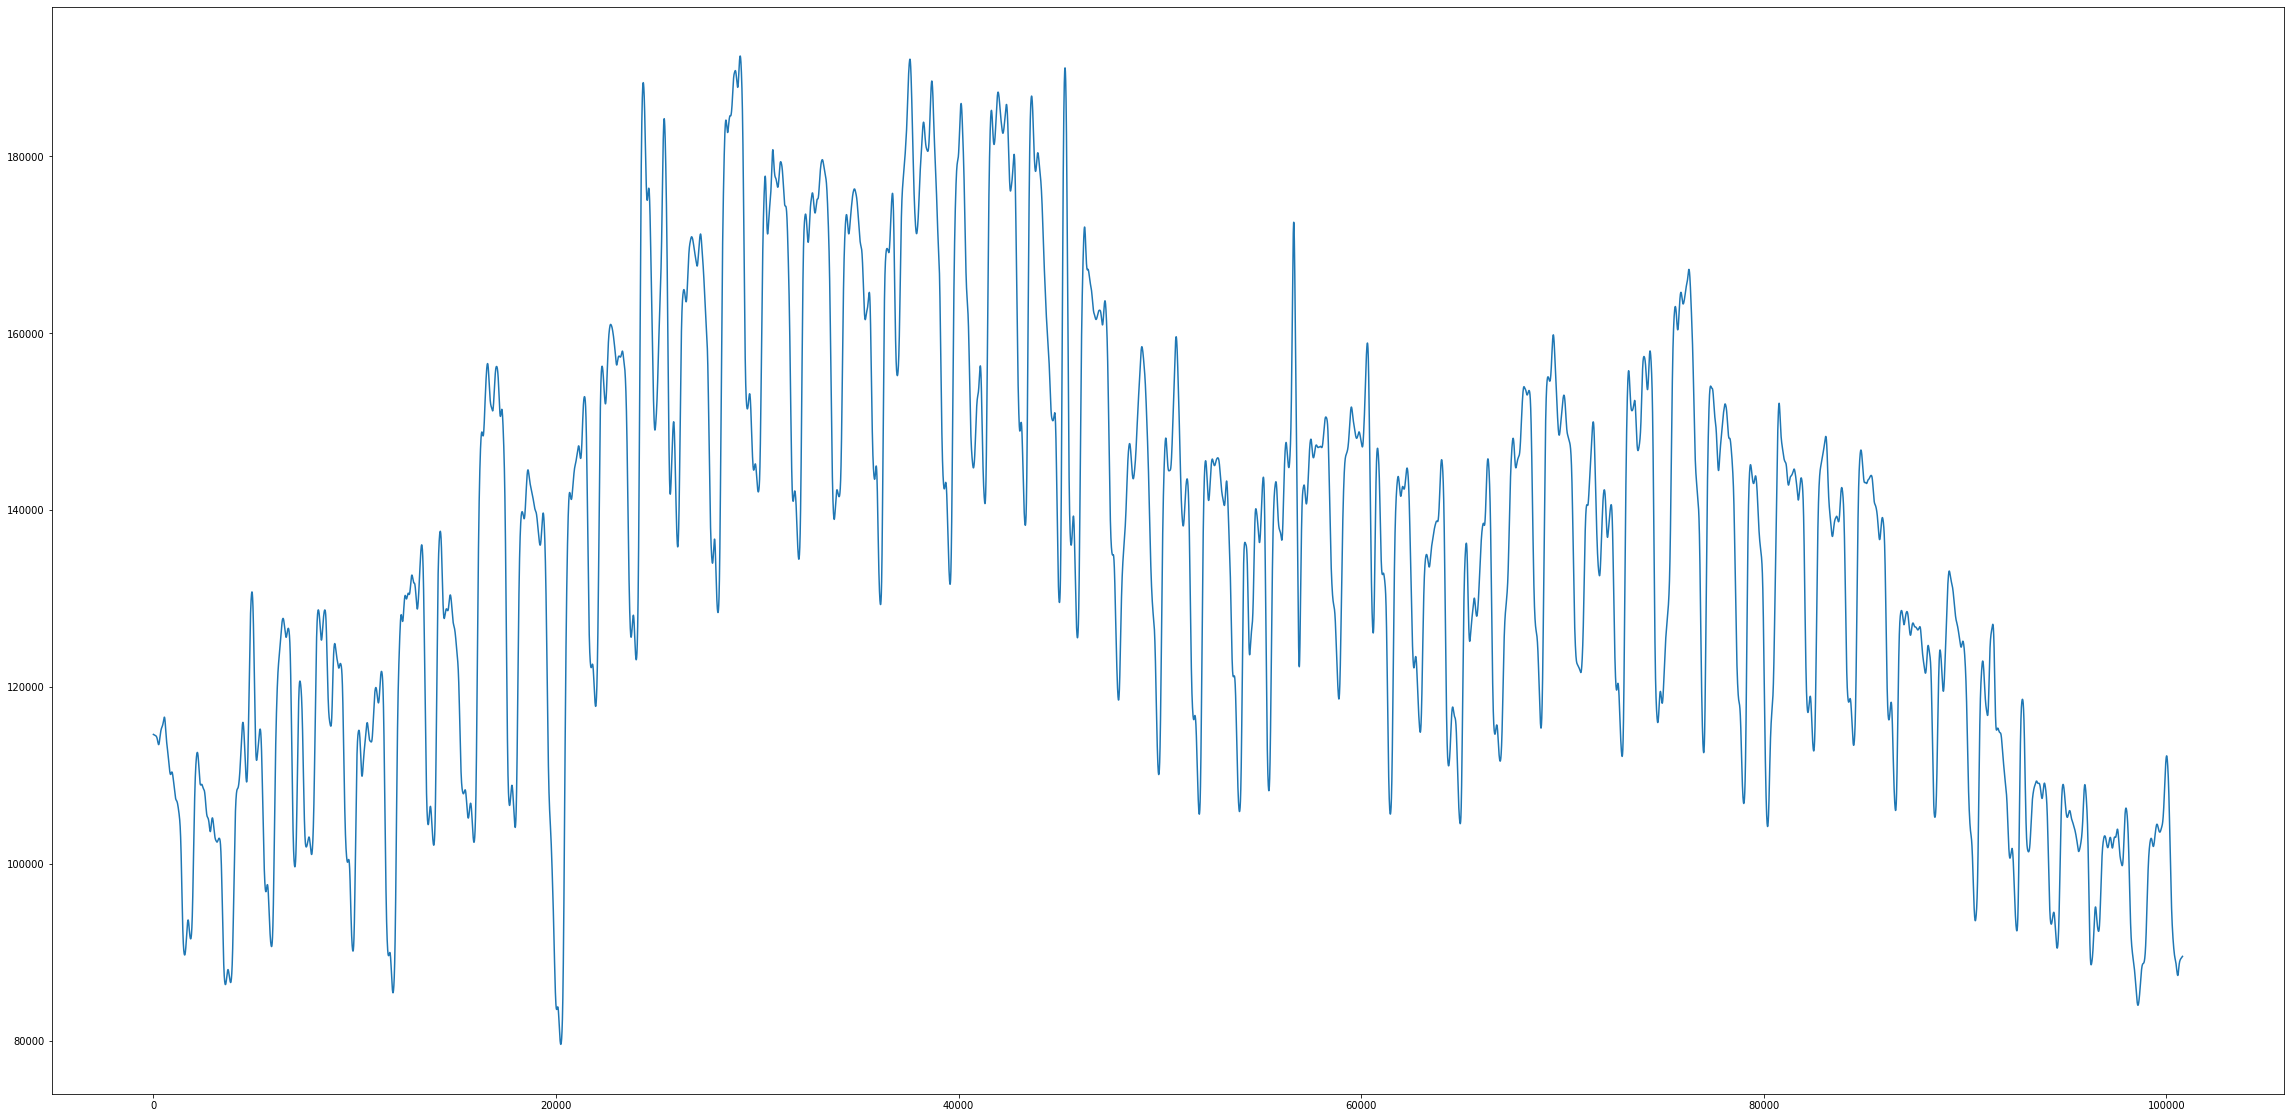

In [144]:
plt.figure(figsize=(40,20))
plt.plot(decomp.trend)

In [145]:
#this is the actually the yearly seasonality 
#with just 1 year of data we cannot predict this component
#so I will try forecasting both with and without this component

In [146]:
df_no_year_seas = po.DataFrame(decomp.seasonal + decomp.resid)

In [10]:
df = po.read_csv('../data/2017_energy_5_min_test.csv')

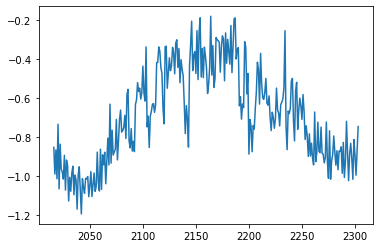

In [13]:
plt.plot(df[7*288:8*288])

In [8]:
7*288

2016